# Customer Booking Prediction Model

### Task Overview

In this task, we will:
1. Explore and prepare the dataset.
2. Train a machine learning model to predict customer bookings.
3. Evaluate the model's performance.
4. Interpret the results and visualize feature importance.
5. Summarize findings.
        

In [1]:
import pandas as pd

# Load the dataset
file_path = 'C:/Users/jckat/Downloads/Portfolio/Machine learning/customer_booking.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display the first few rows of the dataset
data.head(), data.describe()
        

(   num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
 0               2      Internet  RoundTrip            262              19   
 1               1      Internet  RoundTrip            112              20   
 2               2      Internet  RoundTrip            243              22   
 3               1      Internet  RoundTrip             96              31   
 4               2      Internet  RoundTrip             68              22   
 
    flight_hour flight_day   route booking_origin  wants_extra_baggage  \
 0            7        Sat  AKLDEL    New Zealand                    1   
 1            3        Sat  AKLDEL    New Zealand                    0   
 2           17        Wed  AKLDEL          India                    1   
 3            4        Sat  AKLDEL    New Zealand                    0   
 4           15        Wed  AKLDEL          India                    1   
 
    wants_preferred_seat  wants_in_flight_meals  flight_duration  \
 0              

### Data Cleaning and Preprocessing

In [2]:
# Check for missing values
missing_values = data.isnull().sum()

# Convert categorical variables to numerical using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin'], drop_first=True)

# Display the first few rows of the encoded dataset
missing_values, data_encoded.head()
        

(num_passengers           0
 sales_channel            0
 trip_type                0
 purchase_lead            0
 length_of_stay           0
 flight_hour              0
 flight_day               0
 route                    0
 booking_origin           0
 wants_extra_baggage      0
 wants_preferred_seat     0
 wants_in_flight_meals    0
 flight_duration          0
 booking_complete         0
 dtype: int64,
    num_passengers  purchase_lead  length_of_stay  flight_hour  \
 0               2            262              19            7   
 1               1            112              20            3   
 2               2            243              22           17   
 3               1             96              31            4   
 4               2             68              22           15   
 
    wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
 0                    1                     0                      0   
 1                    0                     0      

### Model Training

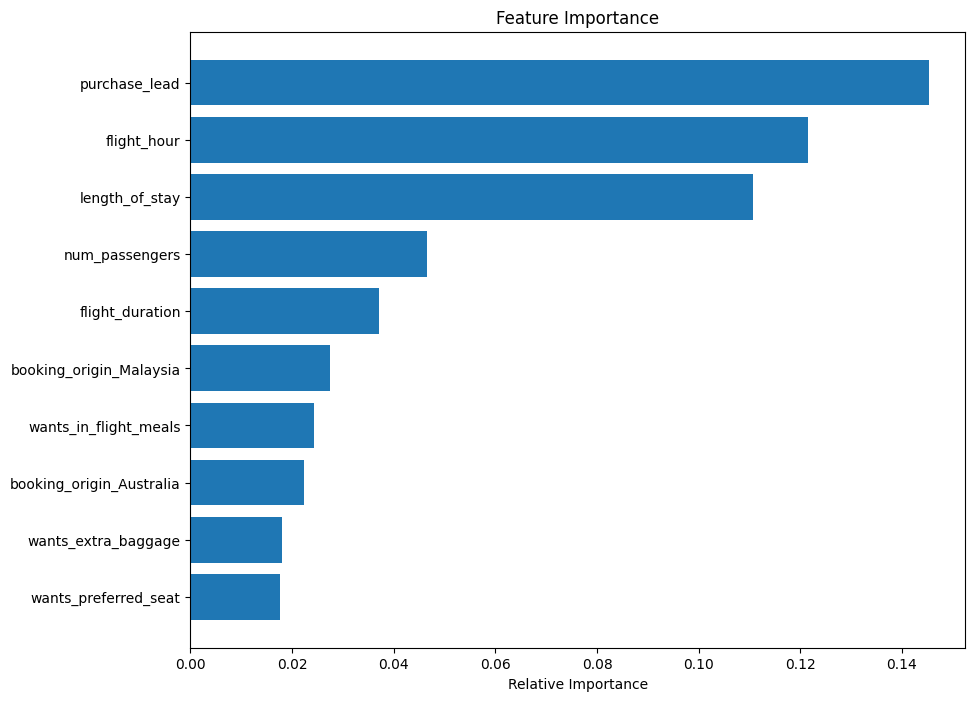

(0.8532666666666666,
 '              precision    recall  f1-score   support\n\n           0       0.87      0.98      0.92     12784\n           1       0.51      0.13      0.20      2216\n\n    accuracy                           0.85     15000\n   macro avg       0.69      0.55      0.56     15000\nweighted avg       0.81      0.85      0.81     15000\n')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Define features and target
X = data_encoded.drop(columns=['booking_complete'])
y = data_encoded['booking_complete']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Feature importance
feature_importances = model.feature_importances_
indices = np.argsort(feature_importances)[-10:]  # Top 10 features

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.title("Feature Importance")
plt.barh(range(len(indices)), feature_importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

accuracy, report
        

### Summarize Findings

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the top 10 features and their importance
top_features = [X.columns[i] for i in indices]
top_importances = feature_importances[indices]

# Create a summary slide for PowerPoint
import pptx
from pptx.util import Inches

# Create a presentation object
prs = pptx.Presentation()

# Add a title slide
slide_layout = prs.slide_layouts[0]
slide = prs.slides.add_slide(slide_layout)
title = slide.shapes.title
subtitle = slide.placeholders[1]

title.text = "Customer Booking Prediction Model"
subtitle.text = "Summary of Findings"

# Add a content slide
slide_layout = prs.slide_layouts[1]
slide = prs.slides.add_slide(slide_layout)
shapes = slide.shapes
title_shape = shapes.title
body_shape = shapes.placeholders[1]

title_shape.text = "Model Performance and Feature Importance"

tf = body_shape.text_frame
tf.text = f"Model Accuracy: {accuracy * 100:.2f}%"

p = tf.add_paragraph()
p.text = "Classification Report:"
p.level = 1

p = tf.add_paragraph()
p.text = report
p.level = 2

# Add a feature importance chart to the slide
slide_layout = prs.slide_layouts[5]
slide = prs.slides.add_slide(slide_layout)
title_shape = slide.shapes.title
title_shape.text = "Feature Importance"

# Plot and save the feature importance chart
fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(range(len(indices)), top_importances, align='center')
ax.set_yticks(range(len(indices)))
ax.set_yticklabels(top_features)
ax.set_xlabel("Relative Importance")
ax.set_title("Top 10 Features")
plt.tight_layout()
plt.savefig("feature_importance.png")

# Add the chart image to the slide
slide.shapes.add_picture("feature_importance.png", Inches(1), Inches(2), height=Inches(4.5))

# Save the PowerPoint presentation
pptx_path = "Customer_Booking_Prediction_Summary.pptx"
prs.save(pptx_path)

pptx_path
        

ModuleNotFoundError: No module named 'pptx'